In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("bank.csv")
print(data.info())
print(data.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11150 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11162 non-null  object 
 3   education  11162 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB
None
            count         mean          std     min    25%    5

In [3]:
binary_variables = ["deposit", "loan", "housing","default"]
for var in binary_variables:
    data[var] = data[var].map({"yes" : 1, "no" : 0})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11150 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11162 non-null  object 
 3   education  11162 non-null  object 
 4   default    11162 non-null  int64  
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  int64  
 7   loan       11162 non-null  int64  
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  int64  
dtypes: float64(1), int64(10), object(6)
memory usage: 1.4+ MB


In [4]:
education_dict = {
    "unknown" : 0, 
    "primary" : 1, 
    "secondary" : 2, 
    "tertiary" : 3
}
data["education"] = data["education"].map(education_dict)
data["education"].value_counts()

2    5476
3    3689
1    1500
0     497
Name: education, dtype: int64

In [5]:
poutcome_dict = {
    "unknown" : 0, 
    "failure" : 1, 
    "other" : 2, 
    "success" : 3
}
data["poutcome"] = data["poutcome"].map(poutcome_dict)
data["poutcome"].value_counts()

0    8326
1    1228
3    1071
2     537
Name: poutcome, dtype: int64

In [6]:
data = pd.get_dummies(data, columns=["job", "marital", "contact", "month"])

In [7]:
num_features = ["age", "balance", "day", "duration",
                "campaign", "pdays", "previous", 
                "poutcome", "education"]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[num_features] = scaler.fit_transform(data[num_features])
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11150.0,0.301765,0.154761,0.0,0.181818,0.272727,0.402597,1.0
education,11162.0,0.702353,0.264907,0.0,0.666667,0.666667,1.000000,1.0
default,11162.0,0.015051,0.121761,0.0,0.000000,0.000000,0.000000,1.0
balance,11162.0,0.095121,0.036631,0.0,0.079147,0.084008,0.097160,1.0
housing,11162.0,0.473123,0.499299,0.0,0.000000,0.000000,1.000000,1.0
loan,11162.0,0.130801,0.337198,0.0,0.000000,0.000000,0.000000,1.0
day,11162.0,0.488601,0.280691,0.0,0.233333,0.466667,0.700000,1.0
duration,11162.0,0.095384,0.089489,0.0,0.035061,0.065223,0.127352,1.0
campaign,11162.0,0.024329,0.043904,0.0,0.000000,0.016129,0.032258,1.0
pdays,11162.0,0.061205,0.127203,0.0,0.000000,0.000000,0.025439,1.0


In [9]:
X, y = data.drop("deposit", axis=1), data.deposit

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=54)

# Classification

In [13]:
# Cấu hình mô hình 1
model_1 = Sequential([
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model_1.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history_1 = model_1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid))

# Cấu hình mô hình 2
model_2 = Sequential([
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10,activation='softmax')
])
model_2.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history_2 = model_2.fit(X_train, y_train, epochs=10, batch_size=3, validation_data=(X_valid, y_valid))

# Cấu hình mô hình 3
model_3 = Sequential([
    Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model_3.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history_3 = model_3.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid))


Epoch 1/10
280/280 [==============================] - 1s 2ms/step - loss: 0.3927 - accuracy: 0.3757 - val_loss: 0.3747 - val_accuracy: 0.5441
Epoch 2/10
280/280 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.2247 - val_loss: 0.3747 - val_accuracy: 0.5441
Epoch 3/10
280/280 [==============================] - 0s 1ms/step - loss: 0.3927 - accuracy: 0.2709 - val_loss: 0.3747 - val_accuracy: 0.5441
Epoch 4/10
280/280 [==============================] - 0s 1ms/step - loss: 0.3927 - accuracy: 0.2539 - val_loss: 0.3747 - val_accuracy: 0.5441
Epoch 5/10
280/280 [==============================] - 1s 2ms/step - loss: 0.3927 - accuracy: 0.2743 - val_loss: 0.3747 - val_accuracy: 0.5441
Epoch 6/10
280/280 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.2668 - val_loss: 0.3747 - val_accuracy: 0.0000e+00
Epoch 7/10
280/280 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.2670 - val_loss: 0.3747 - val_accuracy: 0.5441
Ep

# Vẽ đồ thị loss và accuracy của mỗi mô hình

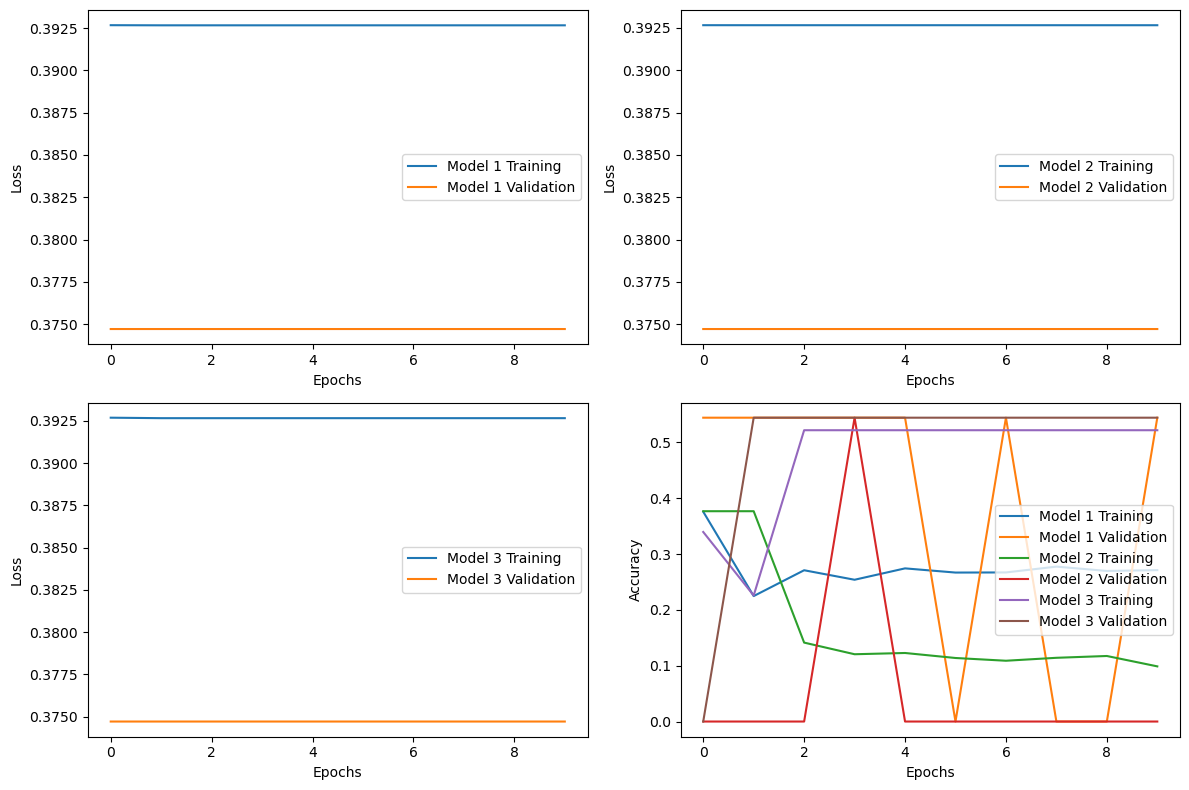

In [14]:
plt.figure(figsize=(12, 8))

# Loss
plt.subplot(2, 2, 1)
plt.plot(history_1.history['loss'], label='Model 1 Training')
plt.plot(history_1.history['val_loss'], label='Model 1 Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history_2.history['loss'], label='Model 2 Training')
plt.plot(history_2.history['val_loss'], label='Model 2 Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(history_3.history['loss'], label='Model 3 Training')
plt.plot(history_3.history['val_loss'], label='Model 3 Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(2, 2, 4)
plt.plot(history_1.history['accuracy'], label='Model 1 Training')
plt.plot(history_1.history['val_accuracy'], label='Model 1 Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(history_2.history['accuracy'], label='Model 2 Training')
plt.plot(history_2.history['val_accuracy'], label='Model 2 Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(history_3.history['accuracy'], label='Model 3 Training')
plt.plot(history_3.history['val_accuracy'], label='Model 3 Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Regression

In [12]:
# Cấu hình mô hình 1
model_1 = Sequential([
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='sigmoid')
])
model_1.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history_1 = model_1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid))

# Cấu hình mô hình 2
model_2 = Sequential([
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10,activation='sigmoid')
])
model_2.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history_2 = model_2.fit(X_train, y_train, epochs=10, batch_size=3, validation_data=(X_valid, y_valid))

# Cấu hình mô hình 3
model_3 = Sequential([
    Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(10, activation='sigmoid')
])
model_3.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history_3 = model_3.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/10
280/280 [==============================] - 1s 2ms/step - loss: 0.2497 - accuracy: 7.8396e-04 - val_loss: 0.2484 - val_accuracy: 0.0000e+00
Epoch 2/10
280/280 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.5163 - val_loss: 0.2486 - val_accuracy: 0.5441
Epoch 3/10
280/280 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.2335 - val_loss: 0.2487 - val_accuracy: 0.0000e+00
Epoch 4/10
280/280 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.3268 - val_loss: 0.2486 - val_accuracy: 0.5441
Epoch 5/10
280/280 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.3918 - val_loss: 0.2486 - val_accuracy: 0.0000e+00
Epoch 6/10
280/280 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.1535 - val_loss: 0.2487 - val_accuracy: 0.0000e+00
Epoch 7/10
280/280 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.3517 - val_loss: 0.2485 - val_acc

# Vẽ đồ thị loss và accuracy của mỗi mô hình

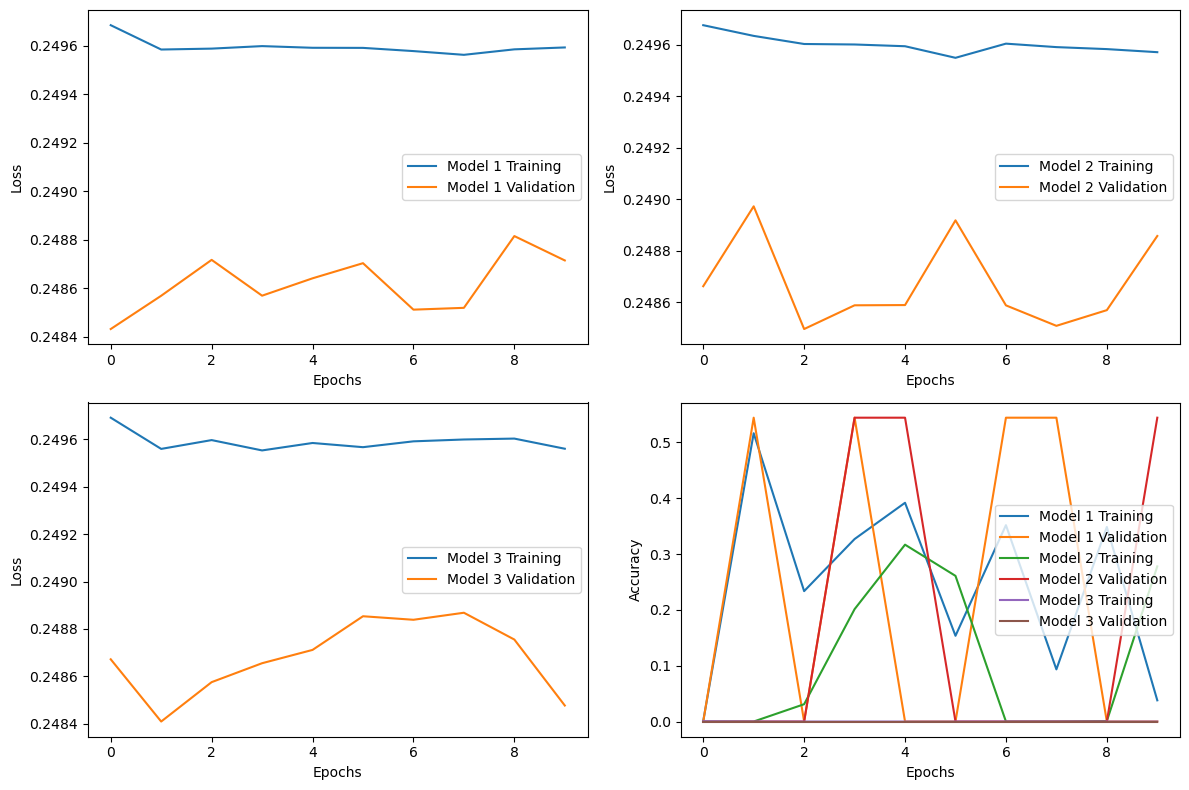

In [13]:
plt.figure(figsize=(12, 8))

# Loss
plt.subplot(2, 2, 1)
plt.plot(history_1.history['loss'], label='Model 1 Training')
plt.plot(history_1.history['val_loss'], label='Model 1 Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history_2.history['loss'], label='Model 2 Training')
plt.plot(history_2.history['val_loss'], label='Model 2 Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(history_3.history['loss'], label='Model 3 Training')
plt.plot(history_3.history['val_loss'], label='Model 3 Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(2, 2, 4)
plt.plot(history_1.history['accuracy'], label='Model 1 Training')
plt.plot(history_1.history['val_accuracy'], label='Model 1 Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(history_2.history['accuracy'], label='Model 2 Training')
plt.plot(history_2.history['val_accuracy'], label='Model 2 Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(history_3.history['accuracy'], label='Model 3 Training')
plt.plot(history_3.history['val_accuracy'], label='Model 3 Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()